# Droplet Diameter Calculator & Distribution Plot Generator

## The Droplet Diameter Calculator 
The Droplet Diameter Calculator function takes a .csv file containing droplet measurement results as input, and returns the same .csv file with additional columns for the diameters of all the droplets. Before using the function, make sure to check that the file path is aligned with your directory where the .csv file is located.

In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv('0.tif_result.csv')
df = df.drop([' ','Mean','Min','Max'], axis=1)
df

,Area
0,0.313
1,0.209
2,22.337
3,51.096
4,73.045
5,1.132
6,13.873
7,2.086
8,6.407
9,37.566


In [ ]:
import math
df["Radius"] = np.sqrt(df["Area"] / math.pi)
df["Diameter"] = df["Radius"] * 2

df = np.round(df, decimals=3)
df

# Batch Run

In [10]:
import pandas as pd
import numpy as np
import math
from pathlib import Path  
import os

concentrations = ['50','100','150','300','500']

for conc in concentrations:
    data_path = './results/' + conc + '.tif_result.csv'
    if os.path.isfile(data_path) == True:
        df = pd.read_csv(data_path)
        df = df.drop([' ','Mean','Min','Max'], axis=1)
        df["Radius"] = np.sqrt(df["Area"] / math.pi)
        df["Diameter"] = df["Radius"] * 2
        df = np.round(df, decimals=3)
        filepath = Path('./results/transform/' + conc + '_dataframe.csv') 
        filepath.parent.mkdir(parents=True, exist_ok=True)
        df.to_csv(filepath)
    else:
        continue

# The Distribution Plot Generator

The Distribution Plot Generator function takes the .csv file resulting from the Droplet Diameter Calculator function and creates a violin plot to display the distribution of droplet diameters. This is accomplished using the Seaborn library to generate the visualization. Also check the path where you graph will be saved.

In [14]:
import numpy as np
import seaborn as sns

sns.set_theme()

merged_df = pd.DataFrame(columns=['Concentration','Diameter'])

concentrations = ['50','100','150','300','500']

for conc in concentrations:
    data_path = './results/transform/' + conc + '_dataframe.csv'
    if os.path.isfile(data_path) == True:
        df = pd.read_csv(data_path)
        for index, row in df.iterrows():
            merged_df.loc[len(merged_df.index)] = [conc, row['Area']]
    else:
        continue

merged_df

,Concentration,Diameter
0,50,0.313
1,50,0.209
2,50,22.337
3,50,51.096
4,50,73.045
...,...,...
99,300,27.031
100,300,92.328
101,300,7.004
102,300,10.625


<Axes: xlabel='Concentration', ylabel='Diameter'>

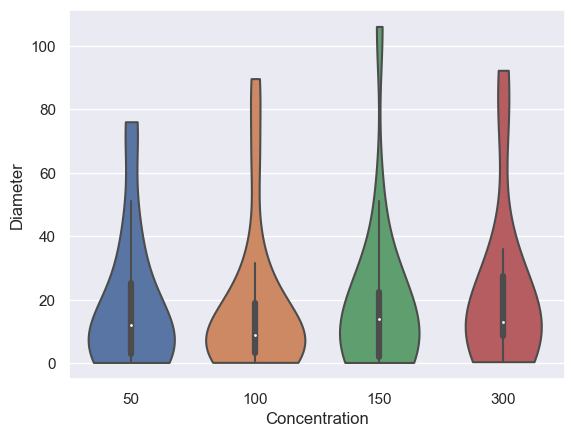

In [19]:
sns.violinplot(data=merged_df, x="Concentration", y="Diameter", cut=0)